# (unsorted) Rotating MNIST
Diagonal online Laplace with a replay buffer v.s. diagonal LoFi

In [1]:
%run rotating_mnist_unsorted.py

  0%|          | 0/5958 [00:00<?, ?it/s]

  0%|          | 0/5958 [00:00<?, ?it/s]

Done!


In [2]:
%config InlineBackend.figure_format = "retina"
kmode = "valid"
ksize = 100
kernel = np.ones(ksize) / ksize

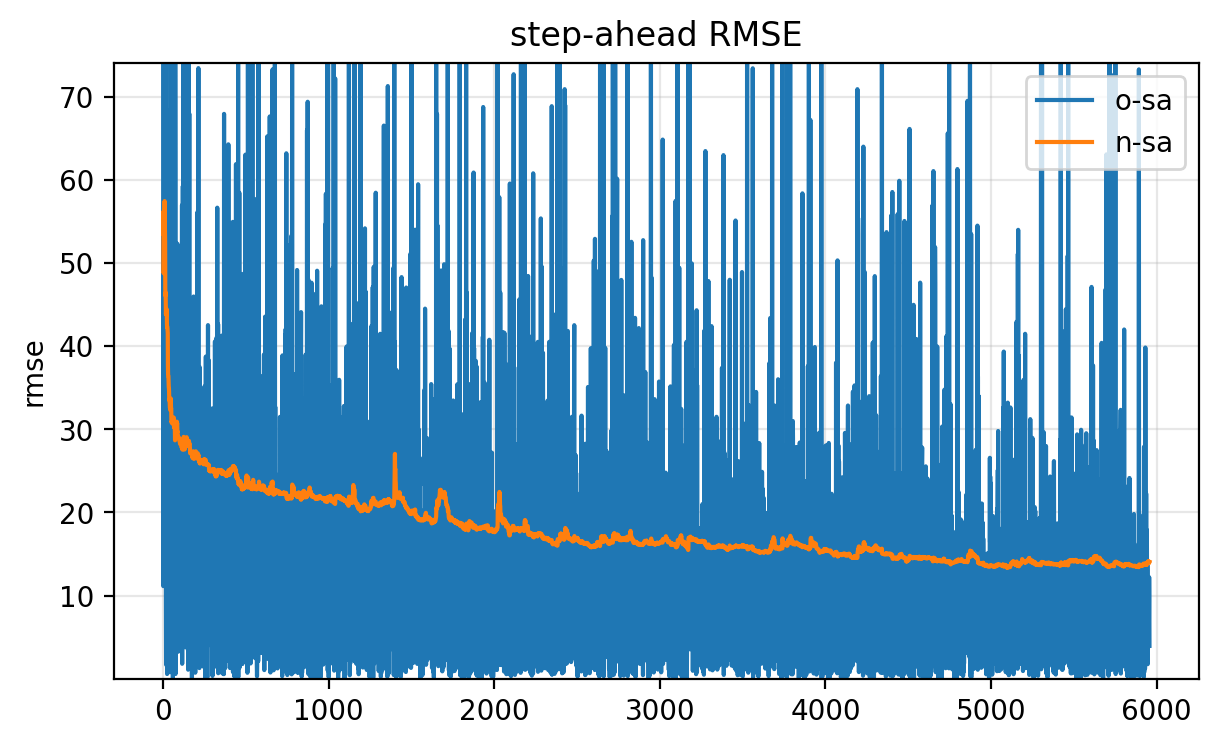

In [3]:
fig, ax = plt.subplots(figsize=(7, 4))

err_smooth_osa = output_lofi["osa-error"]
err_smooth_nsa = output_lofi["nsa-error"]

plt.plot(err_smooth_osa, label="o-sa")
plt.plot(err_smooth_nsa, label="n-sa")

plt.grid(alpha=0.3)

vmin = np.quantile(err_smooth_osa, 0.00)
vmax = np.quantile(err_smooth_osa, 0.99)
plt.ylabel("rmse")
plt.legend()
plt.title("step-ahead RMSE")
plt.ylim(vmin, vmax);

Text(0.5, 1.0, 'step-ahead RMSE (smooth k100)')

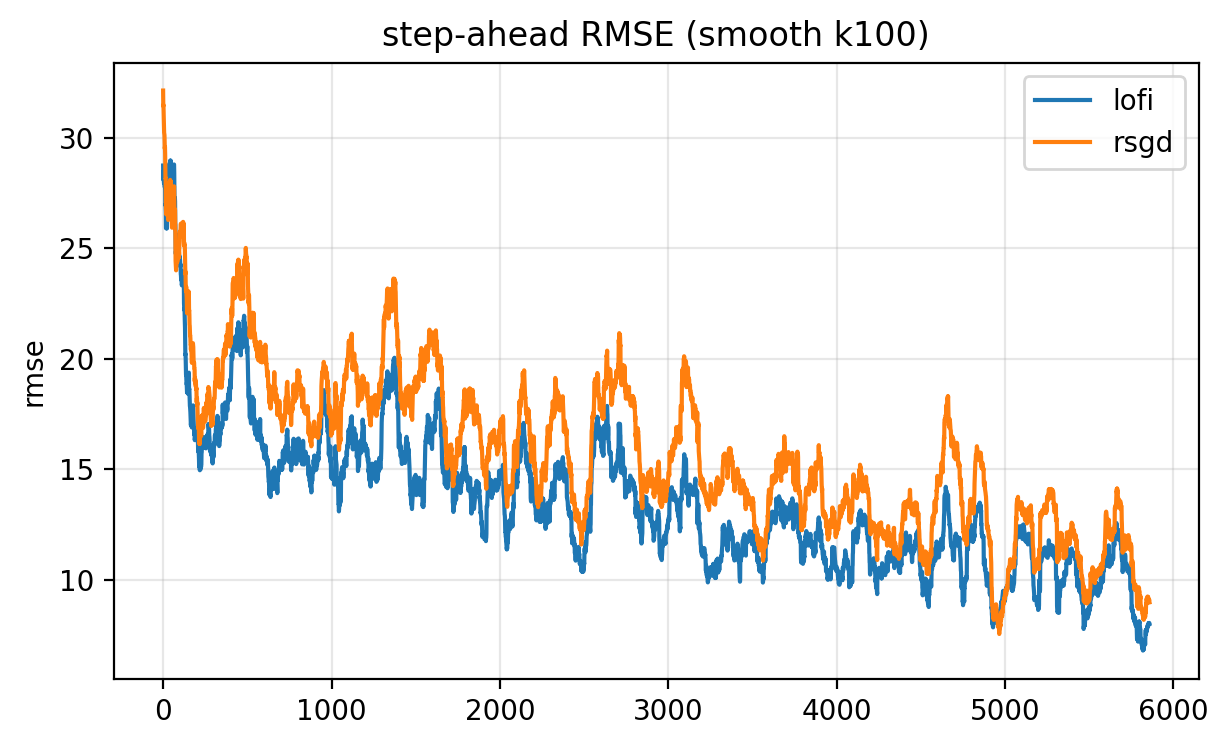

In [6]:
fig, ax = plt.subplots(figsize=(7, 4))

err_smooth_lofi = output_lofi["osa-error"]
err_smooth_rsgd = output_rsgd["osa-error"]

err_smooth_lofi = np.convolve(err_smooth_lofi, kernel, mode=kmode)
err_smooth_rsgd = np.convolve(err_smooth_rsgd, kernel, mode=kmode)

plt.plot(err_smooth_lofi, label="lofi")
plt.plot(err_smooth_rsgd, label="rsgd")

plt.grid(alpha=0.3)

vmin = np.quantile(err_smooth_osa, 0.00)
vmax = np.quantile(err_smooth_osa, 0.99)
plt.ylabel("rmse")
plt.legend()
plt.title(f"step-ahead RMSE (smooth k{ksize})")
# plt.ylim(vmin, vmax);

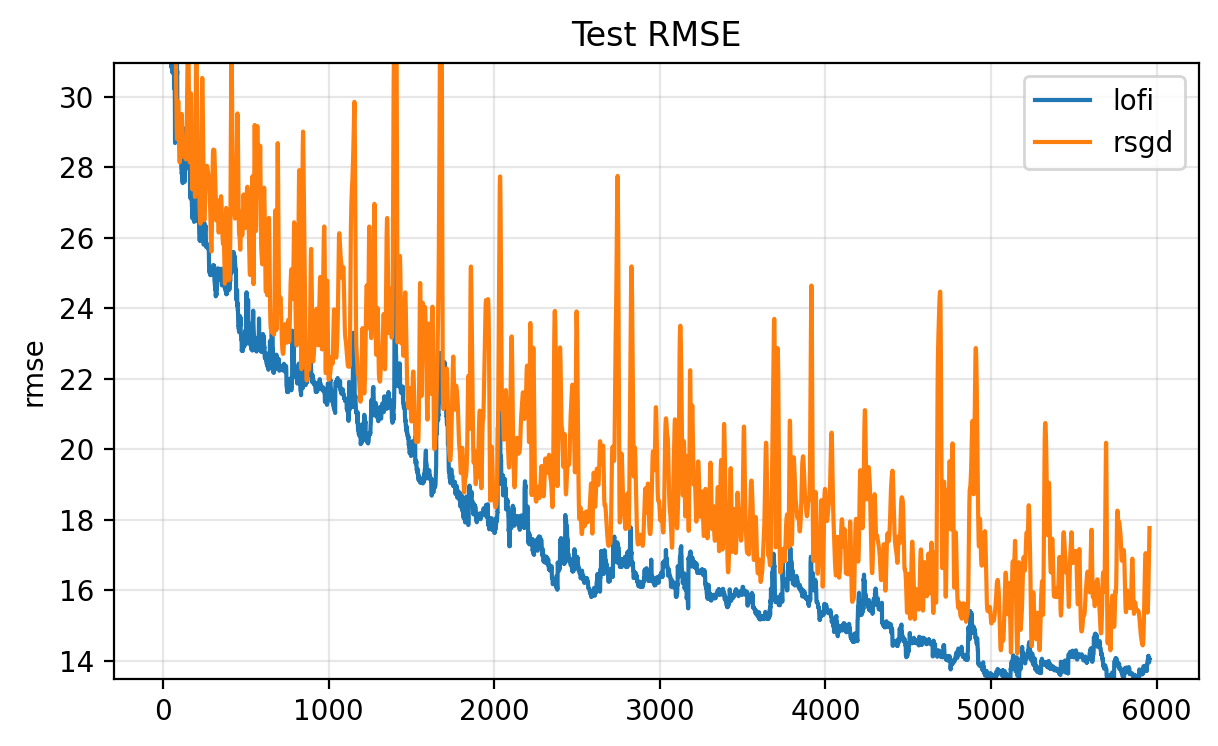

In [7]:
fig, ax = plt.subplots(figsize=(7, 4))

err_smooth_lofi = output_lofi["nsa-error"]
err_smooth_rsgd = output_rsgd["nsa-error"]

plt.plot(err_smooth_lofi, label="lofi")
plt.plot(err_smooth_rsgd, label="rsgd")

plt.grid(alpha=0.3)

vmin = np.quantile(err_smooth_lofi, 0.01)
vmax = np.quantile(err_smooth_lofi, 0.99)
plt.ylabel("rmse")
plt.legend()
plt.title("Test RMSE")
plt.ylim(vmin, vmax);

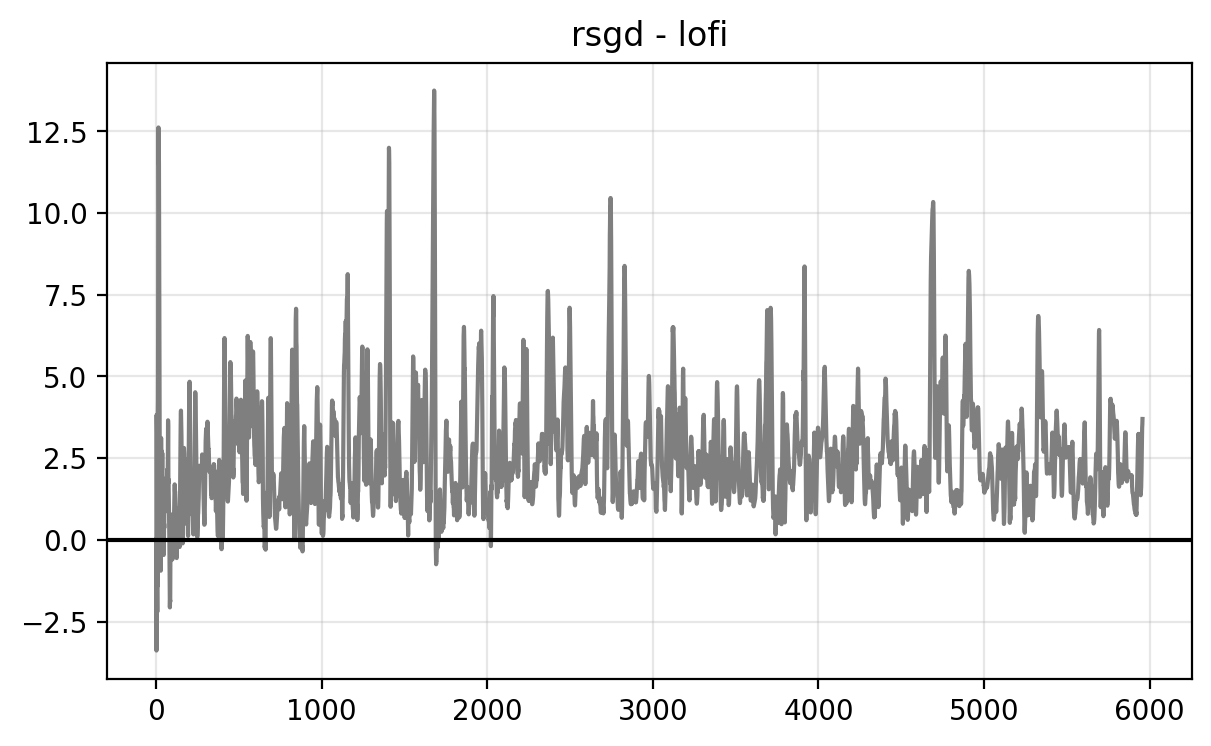

In [8]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(err_smooth_rsgd - err_smooth_lofi, c="tab:gray")
plt.axhline(y=0, c="black")
plt.title("rsgd - lofi")
plt.grid(alpha=0.3)

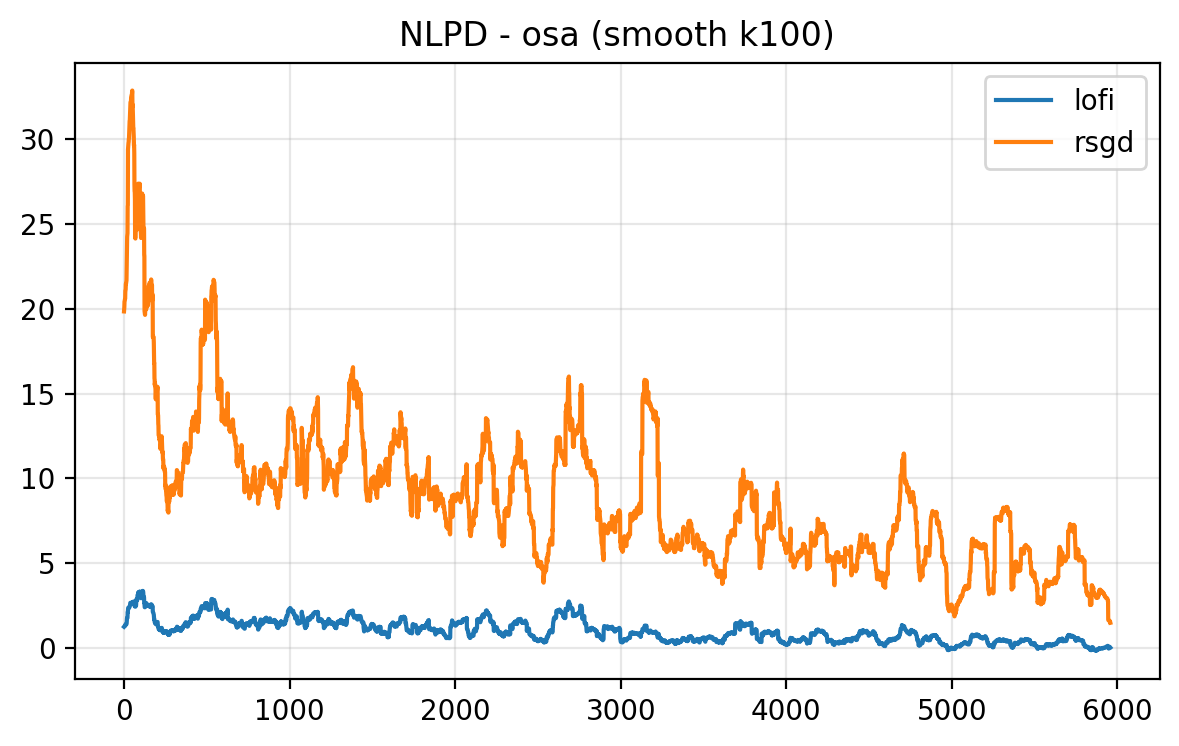

In [9]:
fig, ax = plt.subplots(figsize=(7, 4))

metric_lofi = output_lofi["nlpd"]
metric_rsgd = output_rsgd["nlpd"]

metric_lofi = np.convolve(metric_lofi, kernel, mode="same")
metric_rsgd = np.convolve(metric_rsgd, kernel, mode="same")

plt.plot(metric_lofi, label="lofi")
plt.plot(metric_rsgd, label="rsgd")

plt.title(f"NLPD - osa (smooth k{ksize})")
plt.legend()
plt.grid(alpha=0.3)

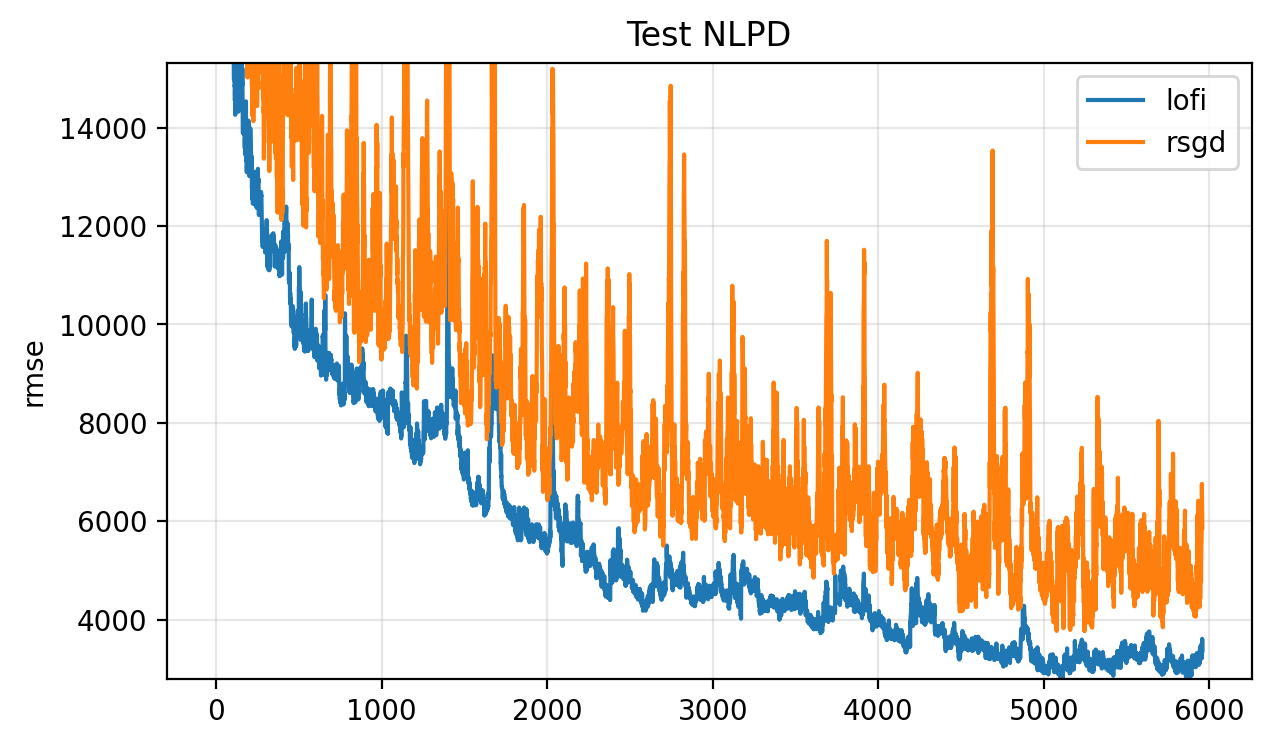

In [10]:
fig, ax = plt.subplots(figsize=(7, 4))

err_smooth_lofi = output_lofi["nlpd_test"]
err_smooth_rsgd = output_rsgd["nlpd_test"]

plt.plot(err_smooth_lofi, label="lofi")
plt.plot(err_smooth_rsgd, label="rsgd")

plt.grid(alpha=0.3)

plt.ylabel("rmse")
plt.legend()
plt.title("Test NLPD")

vmin = np.quantile(err_smooth_lofi, 0.00)
vmax = np.quantile(err_smooth_lofi, 0.98)
plt.ylim(vmin, vmax);

In [13]:
ytest = Y_test * ystd + ymean
yhattest_lofi = agent_lofi.params.emission_mean_function(bel_lofi.mean, X_test).ravel() * ystd + ymean
yhattest_rsgd = agent_rsgd.apply_fn(bel_rsgd.mean, X_test).ravel() * ystd + ymean

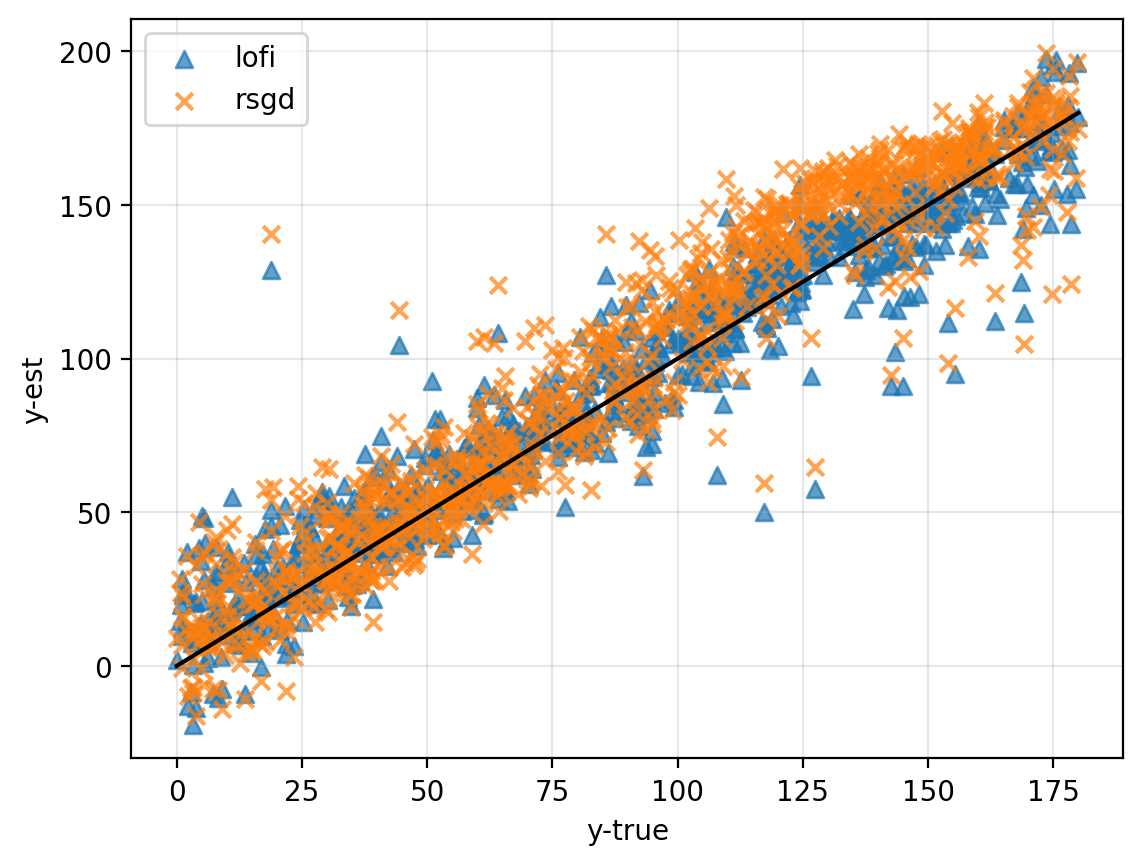

In [23]:
plt.scatter(ytest, yhattest_lofi, label="lofi", alpha=0.7, marker="^")
plt.scatter(ytest, yhattest_rsgd, label="rsgd", alpha=0.7, marker="x")
plt.xlabel("y-true")
plt.ylabel("y-est")
plt.legend()
plt.plot([0,180], [0, 180], c="black")
plt.grid(alpha=0.3)